In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import joblib
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mounted at /content/drive


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Data/flight_and_weather.csv", index_col=0)
print(f"\nBefore Encoding Shape: {df.shape}", end="\n\n")
# print(df.info())
# Dropping columns with redundant or duplicate data
df.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "Time_new",
                 "date",
                 "airport"],

        inplace=True)
# print(df.info())
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])
print(f"\nAfter Encoding Shape: {df.shape}", end="\n\n")
df[["Origin", "Dest"]]
df.to_csv("/content/drive/MyDrive/Data/flight_and_weather_encoded_pipe_line.csv");


Before Encoding Shape: (1851436, 33)


After Encoding Shape: (1851436, 25)



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/flight_and_weather_encoded_pipe_line.csv", index_col=0);
# print(f"\nShape: {df.shape}", end="\n\n")
df

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
0,2016,1,1,1,13,6,745,741.0,0.0,0.0,...,0.0,10,1030,0,23,8,34,29,65,800
1,2016,1,1,1,13,12,820,821.0,1.0,0.0,...,0.0,10,1030,0,23,8,34,29,65,800
2,2016,1,1,1,13,2,759,754.0,0.0,0.0,...,0.0,10,1030,0,23,8,34,29,65,800
3,2016,1,1,1,13,5,738,740.0,2.0,0.0,...,0.0,10,1030,0,23,8,34,29,65,800
4,2016,1,1,1,13,0,745,742.0,0.0,0.0,...,0.0,10,1030,0,23,8,34,29,65,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017,2,5,4,12,8,2115,2112.0,0.0,0.0,...,0.0,10,1009,0,27,17,95,95,11,2100
1851432,2017,2,5,4,12,13,2040,2040.0,0.0,0.0,...,0.0,10,1009,0,27,17,95,95,11,2100
1851433,2017,2,5,4,12,14,2040,2039.0,0.0,0.0,...,0.0,10,1009,0,27,17,95,95,11,2100
1851434,2017,2,5,6,2,14,2035,2030.0,0.0,0.0,...,0.1,10,1006,9,39,39,72,72,40,2100


In [ ]:
#split data for training and testing
labels = df[["ArrDel15", "ArrDelayMinutes"]]
features = df.drop(columns = ['ArrDel15', 'ArrDelayMinutes'])
# print(len(features.columns))
# print(len(labels.columns))
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 25)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148, 2) | labels_test shape: (370288, 2)


In [ ]:
#Filtering data for classification training and testing
classification_features_train, classification_features_test = features_train, features_test
classification_labels_train, classification_labels_test = labels_train["ArrDel15"], labels_test["ArrDel15"]
print(f"classification_features_train shape: {classification_features_train.shape} | classification_features_test shape: {classification_features_test.shape}")
print(f"classification_labels_train shape: {classification_labels_train.shape} | classification_labels_test shape: {classification_labels_test.shape}")


classification_features_train shape: (1481148, 23) | classification_features_test shape: (370288, 23)
classification_labels_train shape: (1481148,) | classification_labels_test shape: (370288,)


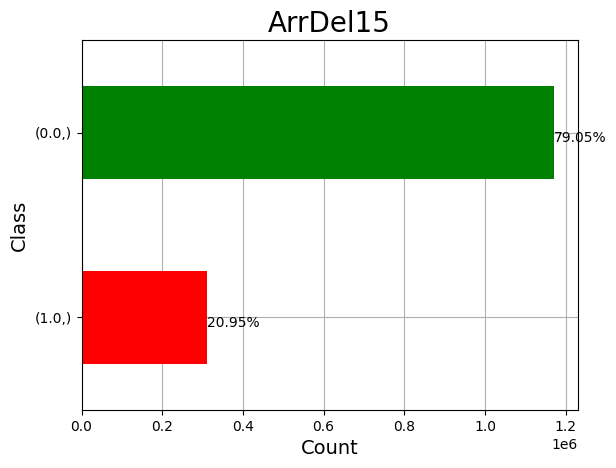

ArrDel15
0.0         1170848
1.0          310300
dtype: int64


In [ ]:
#Showing training data without handling imbalance
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(classification_labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(classification_labels_train).value_counts())
fig = ax.get_figure()


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1, random_state=42)
classification_features_train, classification_labels_train = smote.fit_resample(classification_features_train, classification_labels_train)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
classification_features_train.to_csv("/content/drive/MyDrive/Data/pipe_line_smote_features_train.csv")
pd.DataFrame(classification_labels_train).to_csv("/content/drive/MyDrive/Data/pipe_line_smote_labels_train.csv")
classification_features_train = pd.read_csv("/content/drive/MyDrive/Data/pipe_line_smote_features_train.csv", index_col=0)
classification_labels_train = pd.read_csv("/content/drive/MyDrive/Data/pipe_line_smote_labels_train.csv", index_col=0)
print(classification_labels_train.shape)
print(classification_labels_train)

(2341696, 1)
         ArrDel15
0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
...           ...
2341691       1.0
2341692       1.0
2341693       1.0
2341694       1.0
2341695       1.0

[2341696 rows x 1 columns]


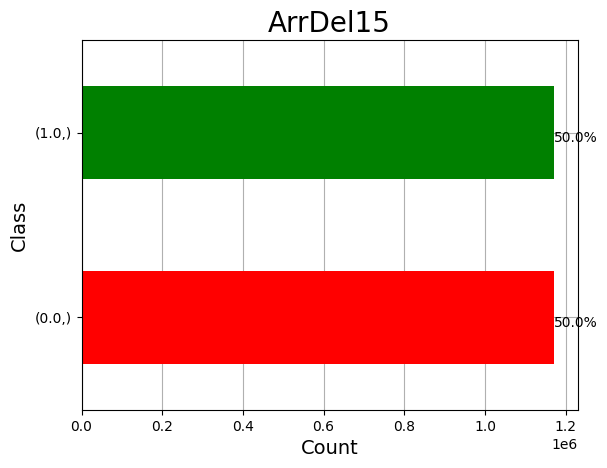

ArrDel15
0.0         1170848
1.0         1170848
dtype: int64


In [ ]:
#Data after handling imbalance with smote
ax = pd.DataFrame(classification_labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(classification_labels_train).value_counts())
fig = ax.get_figure()

#Random Forest Classification

In [ ]:
classification_labels_train = classification_labels_train["ArrDel15"].values
model = RandomForestClassifier(n_jobs=-1)
model.fit(classification_features_train, classification_labels_train)
model_pred = model.predict(classification_features_test)
print(confusion_matrix(classification_labels_test, model_pred))
print(classification_report(classification_labels_test, model_pred))

[[279120  13410]
 [ 19741  58017]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    292530
         1.0       0.81      0.75      0.78     77758

    accuracy                           0.91    370288
   macro avg       0.87      0.85      0.86    370288
weighted avg       0.91      0.91      0.91    370288



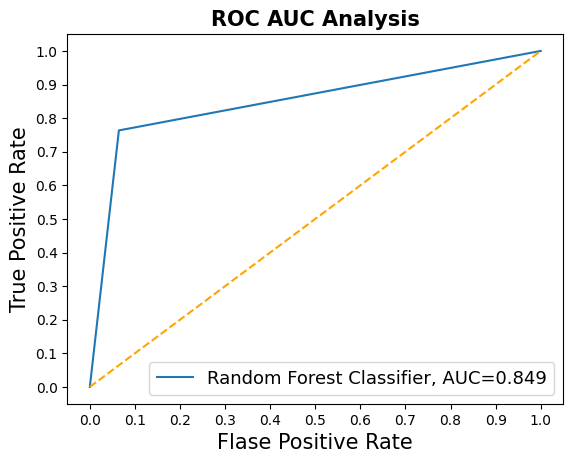

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(classification_labels_test,  model_pred)
auc = roc_auc_score(classification_labels_test, model_pred)
plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format("Random Forest Classifier", auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()

#Random Forest Regression

In [ ]:
#  filter only those flights that are predicted as delayed by the classifier
delayed_flights_features = features_test
# add a column to filter
delayed_flights_features["Predicted_ArrDel15"] = model_pred
delayed_flights_features = delayed_flights_features.loc[:][delayed_flights_features["Predicted_ArrDel15"] == 1.0]
delayed_flights_features = delayed_flights_features.drop(["Predicted_ArrDel15"], axis=1)


In [ ]:
delayed_flights_labels = pd.DataFrame(labels_test["ArrDelayMinutes"])
delayed_flights_labels["Predicted_ArrDel15"] = model_pred
delayed_flights_labels = delayed_flights_labels.loc[:][delayed_flights_labels["Predicted_ArrDel15"] == 1.0]
delayed_flights_labels = delayed_flights_labels.drop(["Predicted_ArrDel15"], axis=1)
delayed_flights_labels = np.asarray(delayed_flights_labels["ArrDelayMinutes"])

In [ ]:
delayed_flights_features.shape, delayed_flights_labels.shape

((78209, 22), (78209,))

In [ ]:
#split data for training and testing
regression_features_train, regression_features_test, regression_labels_train, regression_labels_test = train_test_split(delayed_flights_features, delayed_flights_labels, test_size=0.20, random_state=42)
print(f"regression_features_train shape: {regression_features_train.shape} | regression_features_test shape: {regression_features_test.shape}")
print(f"regression_labels_train shape: {regression_labels_train.shape} | regression_labels_test shape: {regression_labels_test.shape}")


regression_features_train shape: (62567, 22) | regression_features_test shape: (15642, 22)
regression_labels_train shape: (62567,) | regression_labels_test shape: (15642,)


In [ ]:
#Random Forest Regressor
# Helper function for regression report - summary metrics
perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(labels_test, model_pred, regressor_name, perf_df):

    mse = mean_squared_error(labels_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels_test, model_pred)
    r2 = r2_score(labels_test, model_pred)

    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")

    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse,
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

#Model Evaluation

In [ ]:
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(regression_features_train, regression_labels_train)
# model_pred = model.predict(regression_features_test)
# perf_df = print_metrics(regression_labels_test, model_pred, "RandomForestRegressor", perf_df)

from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(regression_features_train, regression_labels_train)
model_pred = model.predict(regression_features_test)
perf_df = print_metrics(regression_labels_test, model_pred, "LinearRegression", perf_df)


MSE      : 5076.73663865993

RMSE     : 71.25122201520428

MAE      : 43.45105950531051

R2 Score : 0.05043005194025474



<ipython-input-22-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


#Regression Analysis

In [ ]:
#split the dataset based on the arrival delay in mins to determine how the regressor performance varies
regression_features_test["ArrDelayMinutes"] = pd.DataFrame(regression_labels_test)[0].values
print("Min: ", regression_features_test["ArrDelayMinutes"].min())
print("Max: ", regression_features_test["ArrDelayMinutes"].max())

Min:  0.0
Max:  1438.0


<ipython-input-26-b731eabc205a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(regression_features_test["ArrDelayMinutes"], shade=True, label='Frequency')


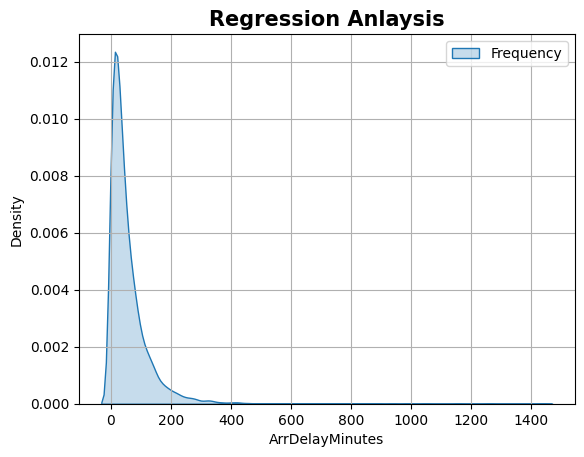

In [ ]:
fig, ax = plt.subplots()
plt.grid()
ax = sns.kdeplot(regression_features_test["ArrDelayMinutes"], shade=True, label='Frequency')
ax.legend(loc='upper right')
plt.title("Regression Anlaysis", fontweight="bold", fontsize=15)
plt.show()

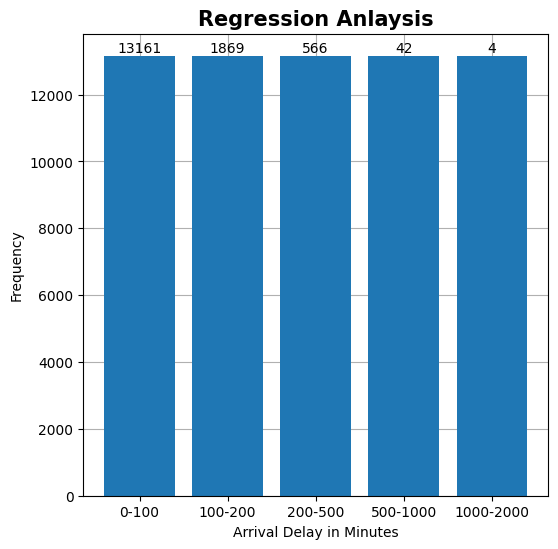

In [ ]:
ranges = [-1, 100, 200, 500, 1000, 2000]
result = regression_features_test["ArrDelayMinutes"].groupby(pd.cut(regression_features_test["ArrDelayMinutes"], ranges)).count()
data = {'0-100': result[0], '100-200': result[1], '200-500': result[2], '500-1000': result[3],'1000-2000': result[4]}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()
ax.set_axisbelow(True)
ax.bar(names, values)
plt.title("Regression Anlaysis", fontweight="bold", fontsize=15)
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Frequency")

rects = ax.patches
labels = list(result)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.show()

In [ ]:
#Range 0 to 100
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(0, 100)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (11629, 24)

MSE      : 243.89176700902675

RMSE     : 15.617034513921865

MAE      : 11.971262461661938

R2 Score : 0.6424087663694527



<ipython-input-20-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


In [ ]:
#Range 100 to 200
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(100, 200)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (2010, 24)

MSE      : 725.4569792447485

RMSE     : 26.9343085904344

MAE      : 18.515242951907133

R2 Score : 0.008612444836337496



<ipython-input-20-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


In [ ]:
#Range 200 to 500
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(200, 500)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (595, 24)

MSE      : 916.1727919327731

RMSE     : 30.26834636931415

MAE      : 19.55112605042017

R2 Score : 0.7887835665467269



<ipython-input-20-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


In [ ]:
#Range 500 to 1000
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(500, 1000)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (39, 24)

MSE      : 1430.8443487179488

RMSE     : 37.82650325787395

MAE      : 19.574358974358972

R2 Score : 0.9126984808118832



<ipython-input-20-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


In [ ]:
#Range 1000 to 20000
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(1000, 2000)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (4, 24)

MSE      : 80440.666625

RMSE     : 283.62063857378223

MAE      : 179.96749999999997

R2 Score : 0.39267603396727846



<ipython-input-20-2b40f1f4eeab>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,
